In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
data = pd.read_csv("/content/sample_data/big-mart.csv")  # reading the data set

In [310]:
print(data.shape)  # knowing the size of data set

(5681, 11)


In [311]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [312]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [313]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [314]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())  # filling null values with mean() of weights

In [315]:
data['Outlet_Size'].value_counts()  # knowing the various sizes 

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [316]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')   # filling null values with medium

In [317]:
data.isnull().sum()   

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

now we dont have any null values in a data set .

In [318]:
data.info() # overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [319]:
data.describe()  #some basic statistics for numerical variables.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [320]:
# combining the Item type , so that we can know types available . 

data['Item_Identifier'].value_counts()   # finding no.of different types of identifiers
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])  # lamda is a function like normal function , 
                                                                                # it returns the value after , :
                                                                                
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})     # mapping the different identifiers as names
d1=data['Item_Type_Combined'].value_counts()
print(d1)

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64


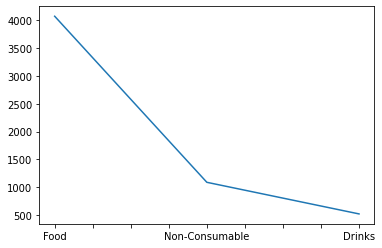

In [321]:
d1.plot()

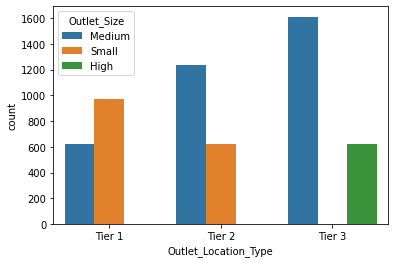

In [322]:
import seaborn as sns
sns.countplot(data['Outlet_Location_Type'],hue=data['Outlet_Size'])

In [323]:
#sns.countplot(data['Outlet_Location_Type'],hue=data['Item_MRP']) # error: to large no.

In [324]:
#Import library:
from sklearn.preprocessing import LabelEncoder #, OneHotEncoder
le = LabelEncoder()     # label encoder = categorical features into numeric values

#New variable for outlet

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'] # we are passing all the coloumns to change into variable


for i in var_mod:
    data[i] = le.fit_transform(data[i])

data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1,1,9
1,FDW14,8.300000,4,0.038428,Dairy,87.3198,OUT017,2007,1,1,1,1,2
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,0,2,0
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,1,1,2
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,3,1,5


In [325]:
# creating dummies in cegrating the types .
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [326]:
data.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,0.118599,Dairy,234.2300,OUT027,1985,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [327]:
data.dtypes   # finding the data types for better clarification

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [328]:
"""
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Drop unnecessary columns:
data.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
data.drop(['source'],axis=1,inplace=True)
"""

"\n#Drop the columns which have been converted to different types:\ndata.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)\n\n#Drop unnecessary columns:\ndata.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)\ndata.drop(['source'],axis=1,inplace=True)\n"

In [329]:
#Here we removed the unwanted coloumns (Parameters/inputs) .
# data.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=0,inplace=True)

In [330]:
data.size

198835

In [331]:
X = data.values
train = X[0:59650] # 59650 data as train data  // nearly 70 of data is using for train
test = X[59650:]  # 13884 data as test data 
predictions = []

In [332]:
data=pd.get_dummies(data)

In [333]:

y=data['Item_MRP']    # considering mrp as main component.
x=data.drop(['Item_MRP'],axis='columns')
y

0       107.8622
1        87.3198
2       241.7538
3       155.0340
4       234.2300
          ...   
5676    141.3154
5677    169.1448
5678    118.7440
5679    214.6218
5680     79.7960
Name: Item_MRP, Length: 5681, dtype: float64

In [334]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [335]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(x_train, y_train) 
y_pred = reg.predict(x_test)

In [336]:
reg.score(x_test,y_pred)

1.0

In [337]:
from xgboost.sklearn import XGBRegressor  # importing extreme gradient boosting 
xgb_reg=XGBRegressor()
xgb_reg.fit(x_train,y_train)

[11:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [338]:
xgb_pred=xgb_reg.predict(x_test)
xgb_pred

array([139.30647, 182.64734, 139.30647, ..., 139.30647, 139.30647,
       139.30647], dtype=float32)

In [339]:
from sklearn import metrics
print(metrics.r2_score(y_test, xgb_pred))
print(np.log(metrics.mean_squared_error(y_test, xgb_pred)))
model.score(x_test,y_test)

0.06446286248442656
8.185708514053118


0.11829344411603893